In [ ]:
평가문항	상세기준
1. 인물모드 사진을 성공적으로 제작하였다.	아웃포커싱 효과가 적용된 인물모드 사진과 동물 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다.
2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.	인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다.
3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.	semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 이유와 함께 제시하였다.

In [11]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib
import os
import numpy as np
from glob import glob
from os.path import join
import tarfile
import urllib
import tensorflow as tf
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


Step 1. 인물모드 직접 해 보기
여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

(145, 189, 3)


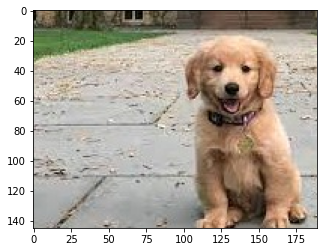

In [170]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog2.jpeg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [171]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f3739584ac0>)

In [172]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [173]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [174]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

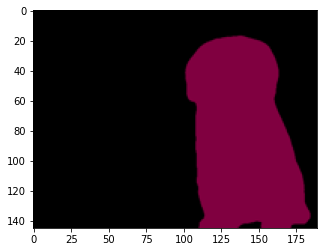

In [175]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [176]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [158]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [159]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [160]:
colormap[12] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([ 64,   0, 128])

In [161]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(168, 300)


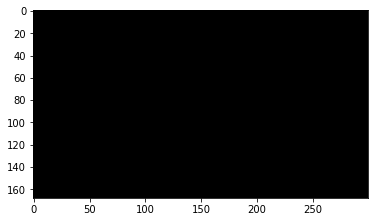

In [167]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

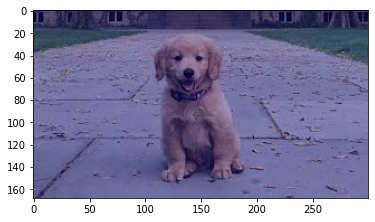

In [168]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

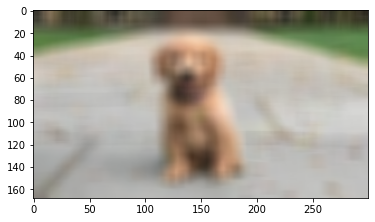

In [169]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 출력 과정 함수화

In [84]:
def human_segmentation(img_path):
    img_orig = cv2.imread(img_path)

    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
    urllib.request.urlretrieve(model_url, model_file)

    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]

    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)
    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3
    seg_color = (128, 128, 192)
    seg_map = np.all(output == seg_color, axis=-1)

    img_show = img_orig.copy()
    img_mask = seg_map.astype(np.uint8) * 255
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

    img_orig_blur = cv2.blur(img_orig, (13, 13))
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    output_dir = os.getenv('HOME') + '/aiffel/human_segmentation/outimages'
    output_path = os.path.join(output_dir, 'output.png')
    cv2.imwrite(output_path, img_orig_blur)  


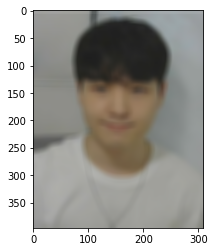

In [85]:
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/myface1.png'  
human_segmentation(img_path1)

## 문제점

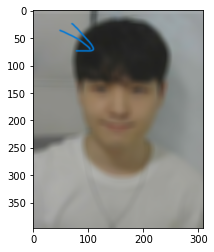

In [88]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/newimages/output1.png'  
img_orig = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

분류는 잘 되었지만, 전부 blur처리가 되어 버렸다.

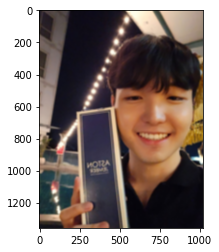

In [86]:
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/myface2.png'  
human_segmentation(img_path2)

## 문제점

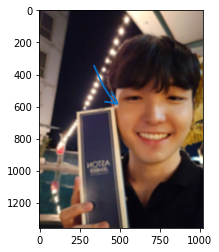

In [89]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/newimages/output2.png'  
img_orig = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

잘 되었지만 테두리 부분이 깔끔하지 못하다

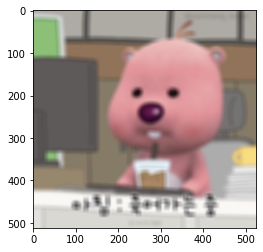

In [78]:
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/myface3.png'  
human_segmentation(img_path3)

## 문제점

예상대로 캐릭터는 사람으로 인식 못한다

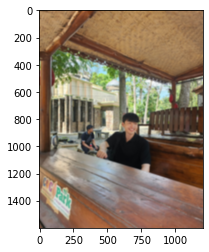

In [87]:
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/myface4.png'  
human_segmentation(img_path4)

## 문제점

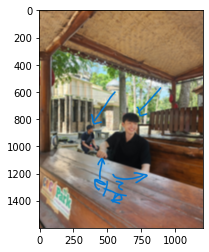

In [90]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/newimages/output4.png'  
img_orig = cv2.imread(img_path) 

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

사람이 너무 작아서 사람은 분류는 되지만 같이 blur처리가 되어 버린다.

# 고양이 분류 함수 정의

In [80]:
def cat_segmentation(img_path):
    img_orig = cv2.imread(img_path)

    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
    urllib.request.urlretrieve(model_url, model_file)

    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]

    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)
    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3
    cat_index = LABEL_NAMES.index('cat')
    seg_color = tuple(colormap[cat_index])
    seg_map = np.all(output == seg_color, axis=-1)

    img_show = img_orig.copy()
    img_mask = seg_map.astype(np.uint8) * 255
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

    img_orig_blur = cv2.blur(img_orig, (13, 13))
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    output_dir = os.getenv('HOME') + '/aiffel/human_segmentation/outimages'
    output_path = os.path.join(output_dir, 'outimage.png')
    cv2.imwrite(output_path, img_show)  



In [100]:
def cat_segmentation2(img_path):
    img_orig = cv2.imread(img_path)

    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
    urllib.request.urlretrieve(model_url, model_file)

    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)

    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]

    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)
    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3
    cat_index = LABEL_NAMES.index('cat')
    cat_index = LABEL_NAMES.index('cat')
    seg_map = (output[:,:,0] == cat_index)


    img_show = img_orig.copy()
    img_mask = seg_map.astype(np.uint8) * 255
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

    img_orig_blur = cv2.blur(img_orig, (13, 13))
    plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    output_dir = os.getenv('HOME') + '/aiffel/human_segmentation/outimages'
    output_path = os.path.join(output_dir, 'outimage.png')
    cv2.imwrite(output_path, img_show)  


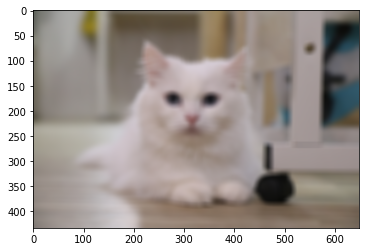

In [81]:
img_path5 = os.getenv('HOME')+'/aiffel/human_segmentation/images/catimage.png'  
cat_segmentation(img_path5)

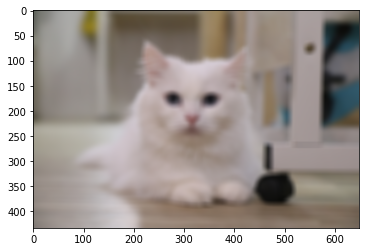

In [101]:
cat_segmentation2(img_path5)

## 문제점

고양이를 인식을 못한다

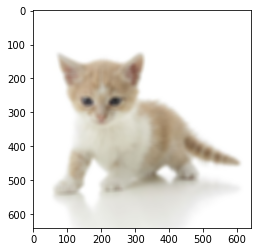

In [98]:
img_path6 = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.jpg'  
cat_segmentation(img_path6)

## 문제점

마찬가지로 고양이를 인식 못함

# 배경전환 크로마키사진 함수정의

In [93]:
def combine_images(person_img_path, background_img_path):
    # 사람 이미지에서 배경 제거
    img_orig = cv2.imread(person_img_path)
    
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
    
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    _, output = model.segmentAsPascalvoc(person_img_path)
    
    seg_color = (128, 128, 192)
    seg_map = np.all(output == seg_color, axis=-1)
    
    img_mask = seg_map.astype(np.uint8) * 255
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_person_only = cv2.bitwise_and(img_orig, img_mask_color)

    # 새로운 배경 이미지와 합치기
    img_background = cv2.imread(background_img_path)
    img_background = cv2.resize(img_background, (img_orig.shape[1], img_orig.shape[0]))  # 사람 이미지와 같은 크기로 리사이즈
    img_background_masked = cv2.bitwise_and(img_background, cv2.bitwise_not(img_mask_color))
    combined_img = cv2.add(img_person_only, img_background_masked)

    plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
    plt.show()

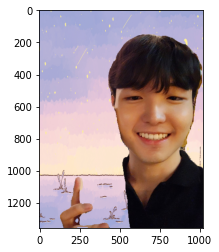

In [96]:
backimg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/background.png'  
combine_images(img_path2, backimg_path)

# 해결책

- 3D Camera 활용하기
스테레오 비전: 두 개의 카메라를 사용하여 물체의 깊이를 측정한다. 두 카메라 간의 거리 차이를 이용하여 3D 정보를 추출한다.
ToF방식: 레이저를 사용하여 물체까지의 거리를 측정한다. 이 방식은 빠르고 정확한 깊이 정보를 제공한다.
DeepLab 모델의 Semantic Segmentation 결과와 3D 카메라의 깊이 정보를 결합하여 보다 정확한 세그멘테이션을 구현할 수 있다. 깊이 정보를 활용하면 물체와 배경의 경계를 더 명확하게 구분할 수 있다.

In [ ]:
- 소프트웨어 기술 활용하기
struct2Depth를 활용하여 2D 이미지에서 깊이 정보를 추출하고, 이를 DeepLab 모델의 결과와 결합하여 세그멘테이션의 정확도를 향상시킬 수 있다.
- 다른 기술과 융합하기
IR 카메라를 사용하여 물체의 깊이 정보를 추가로 얻어내고, 이를 기존의 세그멘테이션 결과와 결합하여 더욱 정확한 결과를 얻을 수 있다.

## 순서도

1. 이미지 캡처
2. 3D 카메라 및 IR 카메라를 사용하여 깊이 정보 추출
3. DeepLab 모델을 사용하여 Semantic Segmentation 수행
4. 깊이 정보와 세그멘테이션 결과 결합
5. 최종 보완된 세그멘테이션 결과 출력

# 회고

평소에 사진에 관심이 많아 과제 자체를 하는 것이 재밌었다. 세그멘테이션에 대해 개념적인 부분만 알고 어떻게 활용하는지는 몰랐는데 이번 학습을 통해 확실하게 알 수 있었다. 블러 처리가 생각보다 잘 안되고 잘 되더라고 테두리 부분이 잘 처리가 안 되었던 것 같다. 사진 속 대상의 크기, 입고있는 옷들에 영향을 크게 받는 것 같다. 고양이 분류 문제에서는 기존에 cat의 인덱스 값이 있는 위치를 직접 찾는 방식으로 바꾸니


이 기술을 잘 활용하면 스마트팜에서 병충해와 농작물의 구분에도 활용할 수 있을 것 같다. 또한 쓰레기 감지를 하여 위치를 식별해 청소 구역의 우선순위 지정에도 활용할 수 있을 것 같다.